# Excercise 10

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

grid size : 41
number of timesteps : 44
 


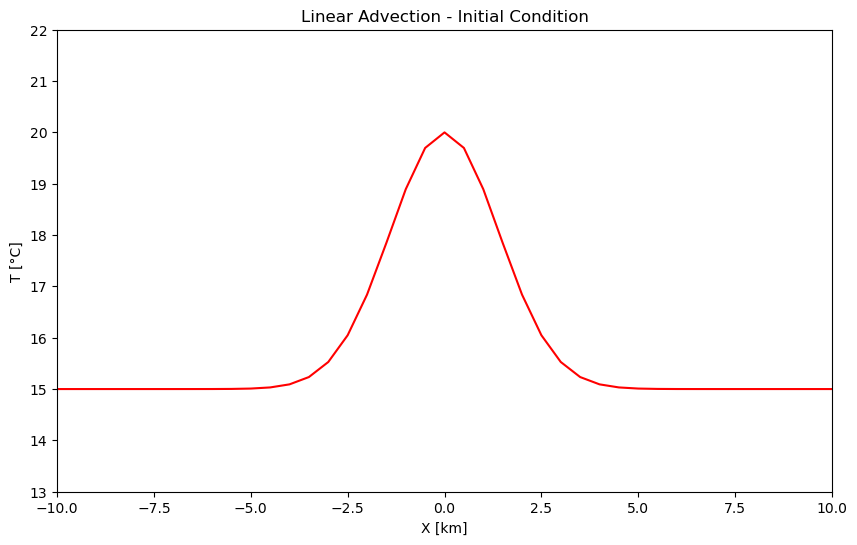

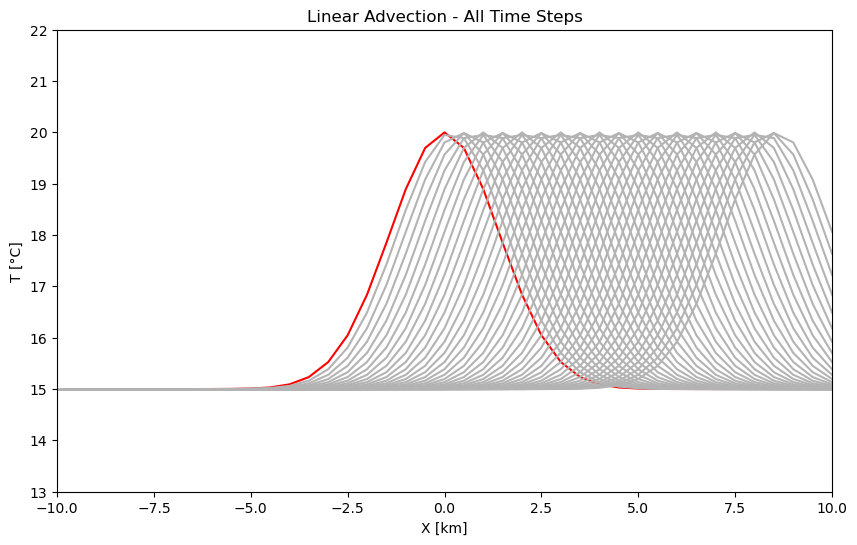

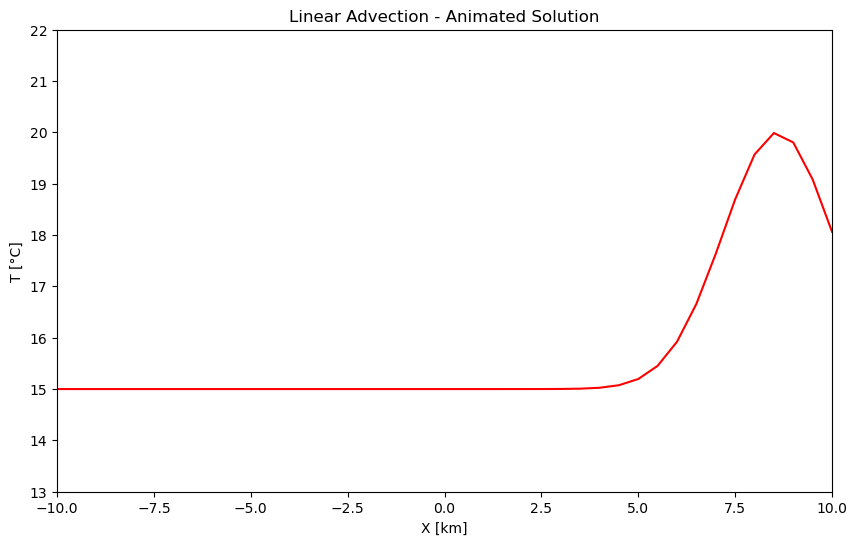

In [13]:

# Linear advection in 1D
# Analytical solution

# problem parameters
c = 1           # Advection speed [m s-1]
dx = 500        # X resolution [m]
dt = 200        # time step [s]
t0 = 0.         # initial time
tmax = 0.1      # duration of simulation [days]
xmax = 10.e3    # Length of the basin [m]

# Grid definition
NT = int(np.floor(tmax*86400/dt))+1  # number of steps (starts from 0)
t = np.zeros(NT)
x = np.arange(-xmax, xmax+dx, dx)  # Equivalent to MATLAB's -xmax:dx:xmax
IM = len(x)  # number of grid points
print(f'grid size : {IM}')
print(f'number of timesteps : {NT}')
print(' ')

# Array to store the analytical solution
T = np.zeros((NT, IM))

# Initial conditions
T0 = 15  # baseline temperature [degC]
sigma = 2000.  # width [m]
A = 5.  # amplitude [degC]
def Gaussian(x):
    return T0 + A*np.exp(-(x/sigma)**2)

T[0,:] = Gaussian(x)
t[0] = t0

# First plot
plt.figure(figsize=(10, 6))
plt.plot(x/1000, T[0,:], 'r')
plt.xlabel('X [km]')
plt.ylabel('T [°C]')
plt.xlim([-xmax/1000, xmax/1000])
plt.ylim([13, 22])
plt.title('Linear Advection - Initial Condition')
plt.show()

# Main time loop to show the analytical solution
plt.figure(figsize=(10, 6))
plt.plot(x/1000, T[0,:], 'r')
plt.xlabel('X [km]')
plt.ylabel('T [°C]')
plt.xlim([-xmax/1000, xmax/1000])
plt.ylim([13, 22])
plt.title('Linear Advection - All Time Steps')

for n in range(1, NT):
    t[n] = t0 + n*dt
    T[n,:] = Gaussian(x-c*t[n])
    plt.plot(x/1000, T[n,:], '-', color=[0.7, 0.7, 0.7])

plt.show()

# Create animation of the solution
fig, ax = plt.subplots(figsize=(10, 6))
line, = ax.plot(x/1000, T[0,:], 'r')
ax.set_xlabel('X [km]')
ax.set_ylabel('T [°C]')
ax.set_xlim([-xmax/1000, xmax/1000])
ax.set_ylim([13, 22])
ax.set_title('Linear Advection - Animated Solution')

def update(frame):
    line.set_ydata(T[frame,:])
    return line,

# Create animation that plays twice (similar to movie(Mov,2) in MATLAB)
ani = FuncAnimation(fig, update, frames=list(range(NT))*2, blit=True, interval=200)

# Display animation in the notebook
HTML(ani.to_jshtml())



### Reference:

I used perxplexity AI to help change to code from Matlab to Jupyter language. I had started but then ran into errors. 

% Linear advection in 1D
% Analytical solution

% problem parameters
c=1;            % Advection speed [m s-1]
dx=500;         % X resolution [m]
dt=200;         % Time step [s]
t0=0.;          % Initial time
tmax=0.1;       % Duration of simulation [days]
xmax=10.e3;     % Length of basin [m]

% Grid definition
NT = floor(tmax*86400/dt)+1;  % Number of steps
t=zeros(NT,1);
x=-xmax:dx:xmax; 
IM=numel(x);    % Grid points
disp(['grid size : ',num2str(IM)])
disp(['number of timesteps : ',num2str(NT)])

% Array initialization
T = zeros(NT,IM);

% Initial conditions
T0 = 15;        % Baseline temperature [°C]
sigma = 2000.;  % Width [m]
A = 5.;         % Amplitude [°C]
Gaussian = @(x) T0+A*exp(-(x/sigma).^2);
T(1,:) = Gaussian(x);
t(1) = t0;

% Visualization
figure
plot(x/1000,T(1,:),'r')
xlabel('X [km]')
ylabel('T [^oC]')
axis([-xmax/1000 xmax/1000 13 22])

Conversion Objectives
The user requested assistance with:
	1.	Syntax translation from MATLAB to Python
	2.	Jupyter notebook compatibility
	3.	Animation implementation
	4.	Output preservation
	5.	Code structure optimization

# Linear advection in 1D - Python implementation
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

# Numerical parameters
c = 1           # Advection speed [m/s]
dx = 500        # Spatial resolution [m]
dt = 200        # Temporal resolution [s]
tmax = 0.1      # Simulation duration [days]
xmax = 10e3     # Domain length [m]

# Computational grid
NT = int(np.floor(tmax*86400/dt)) + 1
x = np.arange(-xmax, xmax+dx, dx)
IM = len(x)
print(f'Grid dimensions: {IM} nodes')
print(f'Temporal resolution: {NT} steps')

# Solution array
T = np.zeros((NT, IM))

# Initial condition function
def gaussian_profile(x):
    T0 = 15     # Base temperature [°C]
    sigma = 2000 # Distribution width [m]
    A = 5       # Thermal amplitude [°C]
    return T0 + A*np.exp(-(x/sigma)**2)

T[0,:] = gaussian_profile(x)

